In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import holoviews
import pygraphviz
import networkx as nx
import pandas as pd
import matplotlib.patches as mpatches
from scipy import stats
import pickle
from networkx.drawing.nx_agraph import write_dot 


In [3]:
dx = pickle.load( open( "graphobjs/dictio_dx.p", "rb" ) )

In [4]:
dx.keys()

dict_keys(['Young', 'Old'])

In [5]:
dx['Young'].keys()

dict_keys(['D0', 'D2', 'D4', 'D7'])

In [6]:
type(dx['Young']['D2'])

networkx.classes.digraph.DiGraph

In [7]:
G = dx['Young']['D2']

In [8]:
len(G.nodes())

1797

In [9]:
simcyc = list(nx.simple_cycles(G))

In [10]:
len(simcyc)  # number of cycles, all sizes included

187

In [11]:
l_cyc = []
for l in simcyc:
    if len(l) >= 2:
        tmp = sorted(list(set([i for i in l])))
        if tmp not in l_cyc:
            l_cyc.append(tmp)

In [12]:
print(len(l_cyc))

117


In [13]:
l_so_cyc = sorted(l_cyc, key=len, reverse=True)

In [14]:
print(l_so_cyc[4])

['Cadm1_M1', 'Cadm1_M2', 'Cadm3_ECs', 'Cadm3_FAPs', 'Crtam_Neutro']


In [15]:
subcyc = G.subgraph(l_so_cyc[4])

In [16]:
def rendercustom_fig(myG):
    nodes = myG.nodes()
    edges = myG.edges()
    ccc = [ i for i in nx.get_node_attributes(myG, 'color').values()]
    eee = [ i for i in nx.get_edge_attributes(myG, 'ecolor').values()]
    fig = plt.figure()
    pos = nx.spring_layout(myG, k=0.5)

    nodes = nx.draw_networkx_nodes(myG,
                                  pos,
                                  node_color = ccc, edgecolors = 'lightgray', 
                                  alpha=0.7)
    edges = nx.draw_networkx_edges(myG,
                                  pos,
                                  edge_color = eee, alpha=0.7)
    ax = plt.gca()
    ax.set_axis_off()
    print(fig.tight_layout())
    return "fig finished"

None


'fig finished'

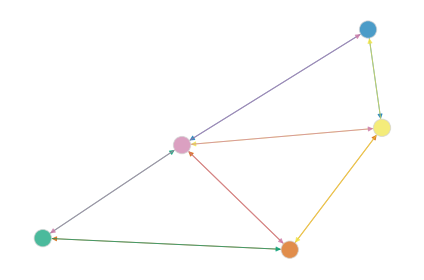

In [17]:
rendercustom_fig(subcyc)

**this was not a good representation, because arcs in oposite directions superpose !!. Better to use DOT (graphviz) representation*** 

In [30]:
from networkx.drawing.nx_agraph import write_dot 

write_dot(subcyc,'properties/cycle_D2.dot') 

Recall: to open a dot file, save to png (in terminal): `$ dot -Tpng -O cycle_D2.dot`

#### check if there are any connected components
Keep graph directed. Here I use a modified algorithm of deep-first search see doc: 
 https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.strongly_connected_components.html?highlight=strongly_connected_component

In [19]:
coco_sorted = sorted( nx.strongly_connected_components(G), key=len, reverse=True)

In [20]:
len([ i for i in coco_sorted if len(i) >= 3])

14

In [21]:
len(coco_sorted[0])

12

In [22]:
sub_coco  = G.subgraph(coco_sorted[0])

None


'fig finished'

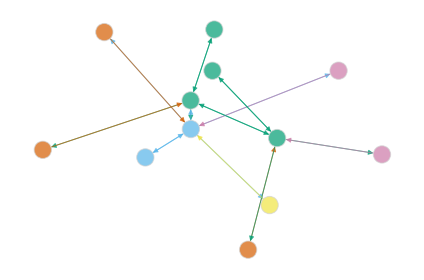

In [23]:
rendercustom_fig(sub_coco)  

In [31]:
write_dot(sub_coco,'properties/dir_compo_D2.dot')  #  to open: dot -Tpng -O filename

In [25]:
coco_sorted[2]

{'Cd22_M1',
 'Cd22_M2',
 'Mrc1_M1',
 'Mrc1_M2',
 'Ptprc_M1',
 'Ptprc_M2',
 'Ptprc_Neutro'}

None


'fig finished'

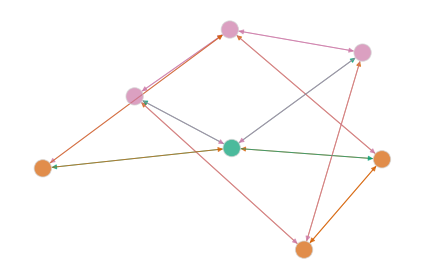

In [26]:
sub_coco_b = G.subgraph(coco_sorted[2])
rendercustom_fig(sub_coco_b)

In [32]:
write_dot(sub_coco_b,'properties/dir_compo_D2_b.dot')  

Transform all dot into png :
```
$ cd properties
$ for i in *; do dot -Tpng -O $i;done
```


In [28]:
## using depth-first traversal algorithm 'find_cycle' only returned: 
##   [[('Sele_ECs', 'Cd44_FAPs', 'forward'), ('Cd44_FAPs', 'Sele_ECs', 'forward')]]
#cyclesList = []
#try:
#    cyclesList.append(nx.find_cycle(G, orientation="original"))
#except:
#    pass


In [29]:
# -----------------------------
# end johaGL
# note: in fedora to make pygraphviz work: 
# sudo yum install graphviz graphviz-devel